Reba Hamlin
DATA MINING – CSE 632
Project 1

Goals:
- Review three published academic papers on data mining applications in crime data analysis. Summarize these papers in your project report.
- Explore Data & answer questions (EDA)
- Hypothesis
- Preprocess the Data
- Data Visualization


North Star - Show how LA crime trends differ across time, location, and demographics using 3 hypotheses

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [4]:
#Load Dataset
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [6]:
# previewing the dataset
df.head()          # first 5 rows

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


In [9]:
df.shape           # rows & columns

(1004991, 28)

In [11]:
df.info()          # column dtypes + non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

In [13]:
df.describe()      # numeric summary

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004991e+06,1.004975e+06,327247.000000,1.004980e+06,69160.000000,2314.000000,64.00000,1.004991e+06,1.004991e+06
mean,2.202215e+08,1.339900e+03,1.069174e+01,1.115633e+03,1.400348e+00,5.001568e+02,2.891706e+01,3.056201e+02,363.955300,4.999174e+02,958.101258,984.015990,991.21875,3.399821e+01,-1.180909e+02
std,1.319718e+07,6.510613e+02,6.110255e+00,6.111605e+02,4.899691e-01,2.052731e+02,2.199272e+01,2.193021e+02,123.734528,2.050736e+02,110.354348,52.350982,27.06985,1.610713e+00,5.582386e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,310.000000,821.00000,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,311.000000,3.310000e+02,998.000000,998.000000,998.00000,3.401470e+01,-1.184305e+02
50%,2.209159e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.00000,3.405890e+01,-1.183225e+02
75%,2.311103e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.00000,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,516.000000,9.560000e+02,999.000000,999.000000,999.00000,3.433430e+01,0.000000e+00


In [15]:
# previewing the column names and size
print(df.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [17]:
# Missing values overview
df.isnull().sum().sort_values(ascending=False)

Crm Cd 4          1004927
Crm Cd 3          1002677
Crm Cd 2           935831
Cross Street       850755
Weapon Used Cd     677744
Weapon Desc        677744
Mocodes            151619
Vict Descent       144656
Vict Sex           144644
Premis Desc           588
Premis Cd              16
Crm Cd 1               11
Status                  1
LAT                     0
LOCATION                0
Status Desc             0
DR_NO                   0
Date Rptd               0
Vict Age                0
Crm Cd Desc             0
Crm Cd                  0
Part 1-2                0
Rpt Dist No             0
AREA NAME               0
AREA                    0
TIME OCC                0
DATE OCC                0
LON                     0
dtype: int64

**Notes:**
-Crm Cd 1 = Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
-Crm Cd 2, 3, 4 =  Crime Code 2, 3, and 4 are respectively less serious offenses.
-Weapon Used Cd = The type of weapon used in the crime.
-Weapon Desc= Defines the Weapon Used Code provided
-Mocodes = Modus Operandi: Activities associated with the suspect in commission of the crime.
- Vict Descent
- Vict Sex
- Premis Desc = Defines the Premise Code provided       
- Premis Cd              
- Crm Cd 1               
- Status = status of case

In [20]:
# Missing values summary
missing_table = (
    df.isnull().sum()
      .to_frame(name='Total')
      .assign(Percentage=lambda x: (x['Total'] / len(df) * 100).round(2))
      .query("Total > 0")                # only keep columns with missing data
      .sort_values(by='Total', ascending=False)
)

missing_table.reset_index(inplace=True)
missing_table.rename(columns={'index': 'Column'}, inplace=True)

missing_table


,Column,Total,Percentage
0,Crm Cd 4,1004927,99.99
1,Crm Cd 3,1002677,99.77
2,Crm Cd 2,935831,93.12
3,Cross Street,850755,84.65
4,Weapon Used Cd,677744,67.44
5,Weapon Desc,677744,67.44
6,Mocodes,151619,15.09
7,Vict Descent,144656,14.39
8,Vict Sex,144644,14.39
9,Premis Desc,588,0.06


In [22]:
missing_table.head(10)  # show top 10 offenders

,Column,Total,Percentage
0,Crm Cd 4,1004927,99.99
1,Crm Cd 3,1002677,99.77
2,Crm Cd 2,935831,93.12
3,Cross Street,850755,84.65
4,Weapon Used Cd,677744,67.44
5,Weapon Desc,677744,67.44
6,Mocodes,151619,15.09
7,Vict Descent,144656,14.39
8,Vict Sex,144644,14.39
9,Premis Desc,588,0.06


In [24]:
#Checking for duplicated rows
df.duplicated().sum()

0

C:\Users\rebah\AppData\Local\Temp\ipykernel_20628\285459197.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


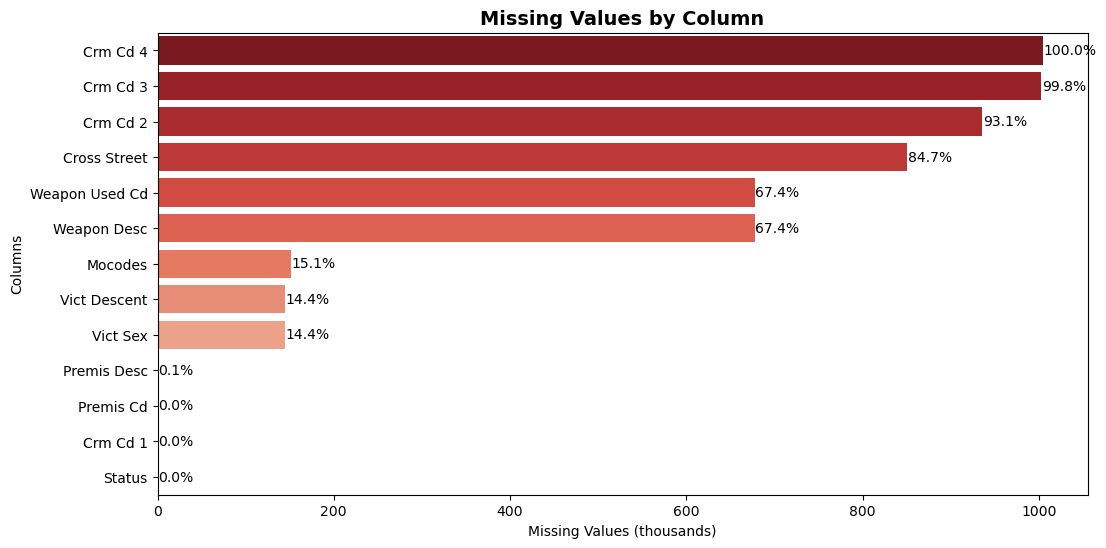

In [26]:
# Visilize the missing values
# Add scaled counts for readability
missing_table['Total_K'] = (missing_table['Total'] / 1000).round(1)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=missing_table,
    x='Total_K',
    y='Column',
    palette='Reds_r'
)

# Add percentage labels to each bar
for i, (value, pct) in enumerate(zip(missing_table['Total_K'], missing_table['Percentage'])):
    ax.text(value + 0.5, i, f"{pct:.1f}%", va='center')

plt.title("Missing Values by Column", fontweight="bold", fontsize=14)
plt.xlabel("Missing Values (thousands)")
plt.ylabel("Columns")
plt.show()


In [28]:
# couting weapon codes in the dataset
df["Weapon Used Cd"].value_counts()

Weapon Used Cd
400.0    174761
500.0     36390
511.0     23846
102.0     20182
109.0      7267
          ...  
120.0         3
121.0         2
119.0         2
124.0         2
123.0         1
Name: count, Length: 79, dtype: int64

##**Hypothesis 1: Victim demographics and premises strongly influence crime type and severity.**

Demographic factors such as victim age, sex, and descent can reveal who is most vulnerable to certain crimes. Likewise, the premise description (e.g., street, residence, business) often dictates the opportunity for different crime types. Prior research has shown that victim profiles and environments play a key role in predicting whether a crime is violent or non-violent. This hypothesis matters because understanding demographic–context interactions allows law enforcement and policymakers to focus prevention efforts on vulnerable populations in specific settings.


##**Hypothesis 2: Crime occurs more frequently during summer months compared to winter months.**

Crime is not uniformly distributed over time, environmental criminology suggests that hot weather, increased social activity, and longer daylight hours may correlate with higher crime rates. Studies have confirmed seasonal spikes in crime, particularly violent crimes, during summer. By analyzing the DATE OCC field, this hypothesis will test whether Los Angeles follows the same trend. Confirming this pattern can help police allocate additional resources seasonally to anticipate and reduce spikes.

##**Hypothesis 3: Certain types of crimes tend to co-occur in specific districts and times.**

Crime patterns are often clustered both spatially and temporally. For example, property crimes such as burglary and auto theft may concentrate in certain neighborhoods, while violent crimes may cluster in others. Moreover, multiple crime types may co-occur within the same districts and time periods, reflecting broader socioeconomic or environmental factors. This hypothesis, grounded in data mining literature, will be tested by looking for crime type co-occurrences across police districts (AREA NAME) and by time of occurrence (TIME OCC, DATE OCC). The results can provide insights into district-level vulnerabilities.


#Preprocessing Steps
1. Handle Missing Data
2. Data Reduction
3. Normalize & Discretize Features
4. Feature Engineering
5. Encode Categorical Variables
6. Outlier & Noise Handling
7. Co-occurrence Preparation

Handling Missing Data

The first issue I noticed was how uneven the dataset was when it came to missing values. Some fields, like Crm Cd 3 and Crm Cd 4, were basically empty, so there was no real benefit in keeping them. Others, like Vict Sex and Vict Descent, had a decent amount of missing entries but not so much that the column was useless. For those, I replaced missing values with an "Unknown" category so they would still show up in counts and groupings. For numeric features like Vict Age, I dropped records with impossible values (like negative ages or values over 120). This way, I kept the structure of the dataset intact without letting the empty fields distort my results.


Normalizing and Discretizing Features

Some of the raw values didn’t make much sense on their own without a bit of grouping. For example, TIME OCC is stored as a four-digit military clock, but I realized it’s much easier to see patterns if you bucket it into parts of the day. I created categories like “Morning” (6–11), “Afternoon” (12–17), “Evening” (18–23), and “Late Night” (0–5). I did something similar with Vict Age, since a raw number like 27 doesn’t really tell much at scale. Grouping ages into ranges like child, teen, young adult, adult, and senior makes the demographics easier to compare. These changes made the dataset a lot more readable and useful for testing hypotheses.


Feature Engineering

I also built a few new features from existing columns. From DATE OCC, I pulled out the year, month, and day of the week, and then added a “season” field to compare crime counts across winter, spring, summer, and fall. I also created a flag for whether a crime was violent or non-violent, based on Part 1-2 and Crm Cd Desc. Finally, I simplified the Premis Desc field by grouping the hundreds of unique premises into broader categories like Residential, Commercial, or Public Space. These engineered features gave me a way to directly connect the raw data to the patterns I was testing.


Handling Outliers and Noise

Finally, I checked for outliers. The first kind were geographic: latitude and longitude values that clearly weren’t inside Los Angeles. These were either dropped or flagged. On the temporal side, I made sure DATE OCC was within the correct range (2020–present). Cleaning out these edge cases was important because bad data points can throw off both maps and time series plots.


Preparing for Co-Occurrence Analysis

Since one of my hypotheses was about crimes happening together in certain districts and times, I reshaped the data for co-occurrence counts. I grouped by (AREA NAME, Month, Time Bucket) and tallied the types of crimes within those slices. From there, I could build cross-tabs showing which crimes appeared together most often in the same district and time. This step essentially set the stage for testing whether the “crime clustering” idea actually holds up in the LA dataset.

In [32]:
# Preprocessing
# ----------------------------
# 1. Handle Missing Data
# ----------------------------
# Drop sparse columns (mostly null)
df = df.drop(columns=["Crm Cd 3", "Crm Cd 4"], errors="ignore")

print(df.columns.tolist())

# Fill categorical missing with "Unknown"
df["Vict Sex"] = df["Vict Sex"].fillna("Unknown")
df["Vict Descent"] = df["Vict Descent"].fillna("Unknown")
df["Premis Desc"] = df["Premis Desc"].fillna("Unknown")
df["Weapon Desc"] = df["Weapon Desc"].fillna("Unknown")

# Vict Age: KEEP 0 and 120 (drop only impossible values)
df = df[(df["Vict Age"] >= 0) & (df["Vict Age"] <= 120)]

# Clarify other catergoties for Vict Sex
def clean_vict_sex(x):
    if x in ["M", "F"]:
        return x
    elif x == "X" or x == "-":
        return "Unknown"
    elif x == "H":
        return "Org/Business"
    else:
        return "Unknown"

df["Vict Sex Clean"] = df["Vict Sex"].apply(clean_vict_sex)



# ----------------------------
# 2. Normalize & Discretize
# ----------------------------
# Time OCC into different buckets (Morning, Afternoon, Evening, & Late Night)
def time_bucket(t):
    if 600 <= t < 1200:
        return "Morning"
    elif 1200 <= t < 1800:
        return "Afternoon"
    elif 1800 <= t <= 2359:
        return "Evening"
    else:
        return "Late Night"

df["Time Bucket"] = df["TIME OCC"].apply(time_bucket)


# --- Age Group (fix bins + labels; keep >60) ---
age_bins = [0, 12, 17, 24, 44, 64, 120]
age_labels = ["Child", "Teen", "Young Adult", "Adult 25–44", "Adult 45–64", "Senior 65+"]
df["Age Group"] = pd.cut(df["Vict Age"], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

# --- Robust DATE OCC (accept date-only too) ---
df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce", infer_datetime_format=True)

# --- Robust TIME OCC -> minutes since midnight + bucket ---
def to_minutes_since_midnight(x):
    val = pd.to_numeric(x, errors="coerce")
    if pd.isna(val): return np.nan
    val = int(val)
    hh, mm = divmod(val, 100)
    if 0 <= hh <= 23 and 0 <= mm <= 59:
        return hh*60 + mm
    return np.nan

df["TIME_MIN"] = df["TIME OCC"].apply(to_minutes_since_midnight)

def bucket_from_minutes(m):
    if pd.isna(m): return np.nan
    if m <= 5*60 + 59: return "Late Night"
    if m <= 11*60 + 59: return "Morning"
    if m <= 17*60 + 59: return "Afternoon"
    return "Evening"

df["Time Bucket"] = df["TIME_MIN"].apply(bucket_from_minutes)

# --- Part class (keep semantics) + proper violent flag ---
df["Part Class"] = df["Part 1-2"].map({1: "Part I", 2: "Part II"}).fillna("Unknown")

violent_kw = ["ASSAULT", "ROBBERY", "HOMICIDE", "MURDER", "RAPE", "SEXUAL", "KIDNAPPING", "ARSON"]
df["IS_VIOLENT"] = (
    df["Crm Cd Desc"]
    .fillna("")
    .astype(str)
    .str.upper()
    .apply(lambda s: int(any(k in s for k in violent_kw)))
)

# --- Drop duplicates by DR_NO if present---
id_col = "DR_NO" if "DR_NO" in df.columns else None
if id_col:
    before = len(df)
    df = df.drop_duplicates(subset=[id_col], keep="first")
    print(f"Dropped {before - len(df)} duplicate incidents by {id_col}")


# ----------------------------
# 3. Feature Engineering
# ----------------------------
# Convert DATE OCC to datetime
df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")


# Extract year, month, day of week, season
df["Year"] = df["DATE OCC"].dt.year
df["Month"] = df["DATE OCC"].dt.month
df["DayOfWeek"] = df["DATE OCC"].dt.day_name()

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["Season"] = df["Month"].apply(get_season)


# Violent vs. Non-Violent (using Part 1-2)
df["Crime Type"] = df["Part 1-2"].map({1: "Violent", 2: "Non-Violent"})

# Simplify Premises
def simplify_premises(x):
    s = str(x).upper()
    if "RESIDENCE" in s or "HOUSE" in s or "APARTMENT" in s or "DWELLING" in s:
        return "Residential"
    elif "STREET" in s or "FREEWAY" in s or "SIDEWALK" in s or "PARKING LOT" in s:
        return "Street/Outdoor"
    elif "SCHOOL" in s or "COLLEGE" in s or "UNIVERSITY" in s or "PLAYGROUND" in s:
        return "School"
    elif "STORE" in s or "MARKET" in s or "SHOP" in s or "MALL" in s or "RESTAURANT" in s or "BAR" in s:
        return "Retail/Restaurant"
    elif "BUSINESS" in s or "OFFICE" in s or "WAREHOUSE" in s or "BANK" in s:
        return "Business/Office"
    elif "HOTEL" in s or "MOTEL" in s:
        return "Hotel/Motel"
    elif "PARK" in s or "RECREATION" in s or "BEACH" in s or "POOL" in s:
        return "Park/Recreation"
    elif "HOSPITAL" in s or "CLINIC" in s or "MEDICAL" in s:
        return "Healthcare"
    elif "CHURCH" in s or "TEMPLE" in s or "MOSQUE" in s:
        return "Religious"
    elif "UNKNOWN" in s or s.strip() == "" or s == "NAN":
        return "Unknown"
    else:
        return "Other"

df["Premis Simplified"] = df["Premis Desc"].apply(simplify_premises)


# ----------------------------
# 4. Outlier Handling
# ----------------------------
# Drop invalid coordinates (outside LA bounding box roughly)
df = df[(df["LAT"].between(33.5, 34.5)) & (df["LON"].between(-119, -117))]

# Drop rows with invalid dates
df = df[(df["Year"] >= 2020) & (df["Year"] <= pd.Timestamp.today().year)]


# ----------------------------
# 5. Co-Occurrence Prep
# ----------------------------
# Group crimes by district, month, and time bucket
co_occurrence = (
    df.groupby(["AREA NAME", "Month", "Time Bucket"])["Crm Cd Desc"]
    .apply(list)
    .reset_index()
)

# Build co-occurrence counts for one district (These rimes occur at the same time)
from collections import Counter
from itertools import combinations

def crime_pairs(crime_list):
    # Remove NaNs, deduplicate within same slice
    crimes = sorted(set([str(c) for c in crime_list if pd.notna(c)]))
    return list(combinations(crimes, 2))

# Apply to grouped crimes
co_occurrence["Pairs"] = co_occurrence["Crm Cd Desc"].apply(crime_pairs)

# Flatten into overall co-occurrence counts
pair_counts = Counter([p for pairs in co_occurrence["Pairs"] for p in pairs])
pair_df = (
    pd.DataFrame(pair_counts.items(), columns=["Crime Pair", "Count"])
    .sort_values("Count", ascending=False)
    .reset_index(drop=True)
)

# ----------------------------
# Save Cleaned Dataset
# ----------------------------
df.to_csv("crime_data_cleaned.csv", index=False)
pair_df.to_csv("crime_cooccurrence.csv", index=False)

['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1', 'Crm Cd 2', 'LOCATION', 'Cross Street', 'LAT', 'LON']


C:\Users\rebah\AppData\Local\Temp\ipykernel_20628\953696931.py:57: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce", infer_datetime_format=True)
C:\Users\rebah\AppData\Local\Temp\ipykernel_20628\953696931.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["DATE OCC"] = pd.to_datetime(df["DATE OCC"], errors="coerce", infer_datetime_format=True)


Dropped 0 duplicate incidents by DR_NO


In [33]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Age Group,TIME_MIN,Part Class,IS_VIOLENT,Year,Month,DayOfWeek,Season,Crime Type,Premis Simplified
0,211507896,04/11/2021 12:00:00 AM,2020-11-07,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,Adult 25–44,525,Part II,0,2020,11,Saturday,Fall,Non-Violent,Residential
1,201516622,10/21/2020 12:00:00 AM,2020-10-18,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,Adult 25–44,1125,Part I,1,2020,10,Sunday,Fall,Violent,Street/Outdoor
2,240913563,12/10/2024 12:00:00 AM,2020-10-30,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,Adult 25–44,760,Part II,0,2020,10,Friday,Fall,Non-Violent,Residential
3,210704711,12/24/2020 12:00:00 AM,2020-12-24,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,Adult 45–64,790,Part I,0,2020,12,Thursday,Winter,Violent,Street/Outdoor
4,201418201,10/03/2020 12:00:00 AM,2020-09-29,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,Adult 45–64,1110,Part I,0,2020,9,Tuesday,Fall,Violent,Other


C:\Users\rebah\AppData\Local\Temp\ipykernel_20628\1917196550.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Premis Simplified", "Age Group"])["IS_VIOLENT"]
C:\Users\rebah\AppData\Local\Temp\ipykernel_20628\1917196550.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals = (h1_counts.groupby(["Premis Simplified", "Age Group"], as_index=False)["Count"]


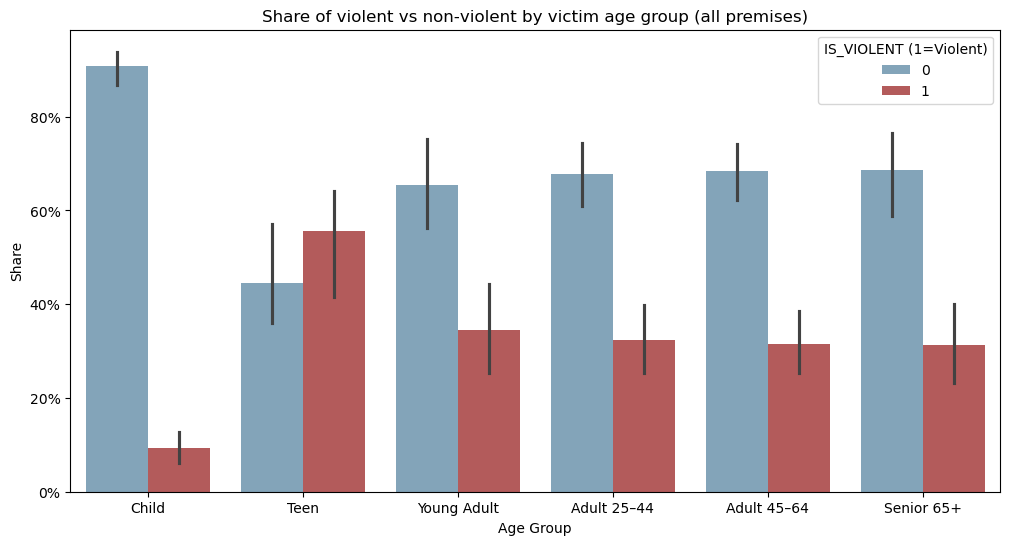

In [60]:
# H1: Violent vs Non-violent shares by premises and age (premises x age x violence)
h1_counts = (
    df.dropna(subset=["Premis Simplified", "Age Group"])
      .groupby(["Premis Simplified", "Age Group"])["IS_VIOLENT"]
      .value_counts()
      .rename("Count")
      .reset_index()
)

totals = (h1_counts.groupby(["Premis Simplified", "Age Group"], as_index=False)["Count"]
                 .sum()
                 .rename(columns={"Count": "Total"}))

h1_share = h1_counts.merge(totals, on=["Premis Simplified", "Age Group"])
h1_share["Share"] = h1_share["Count"] / h1_share["Total"]

# Plot2
plt.figure(figsize=(12,6))
sns.barplot(
    data=h1_share, x="Age Group", y="Share",
    hue="IS_VIOLENT", palette={0:"#7aa6c2", 1:"#c24c4c"}
)
plt.title("Share of violent vs non‑violent by victim age group (all premises)")
plt.ylabel("Share")
plt.gca().yaxis.set_major_formatter(lambda x, pos: f"{x:.0%}")
plt.legend(title="IS_VIOLENT (1=Violent)")

plt.savefig("H1_premises_age.png", dpi=300, bbox_inches="tight")
plt.show()




C:\Users\rebah\AppData\Local\Temp\ipykernel_20628\982198302.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Premis Simplified", "Age Group"])["IS_VIOLENT"]


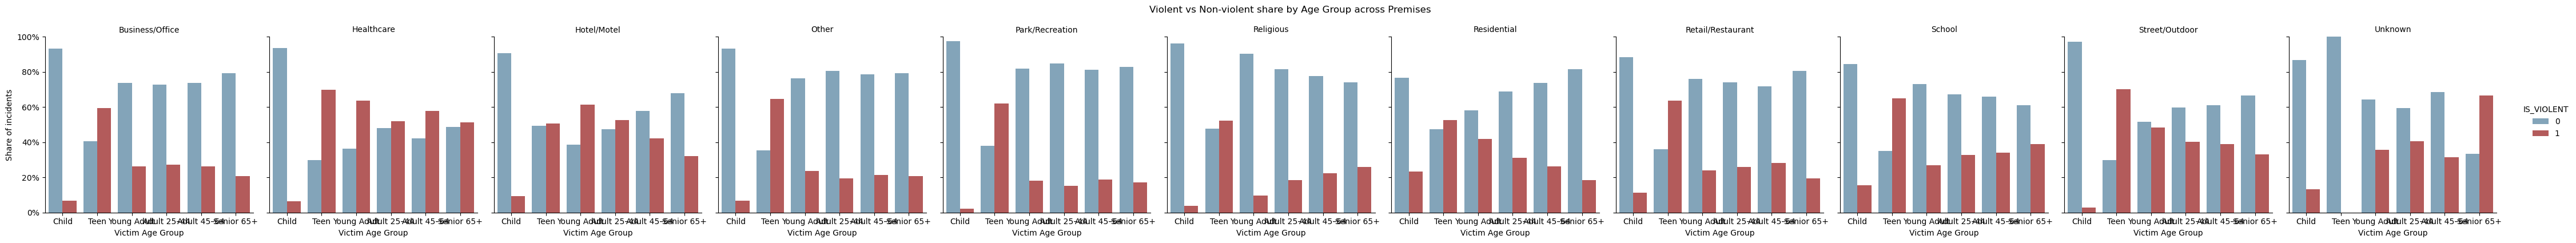

In [70]:
from pathlib import Path
PROJECT_DIR = Path(r"C:\Users\rebah\OneDrive\Documents\0. UofL Computer Science Program\5. Fall 2025\CSE 632 - Data Mining\Projects\0a. Project 1")
FIGDIR = Path.cwd() / "figures"
FIGDIR.mkdir(parents=True, exist_ok=True)



# H1b - Share of violent vs non-violent by Age Group, split by Premis Simplified
h1_counts = (
    df.dropna(subset=["Premis Simplified", "Age Group"])
      .groupby(["Premis Simplified", "Age Group"])["IS_VIOLENT"]
      .value_counts(normalize=True)
      .rename("Share")
      .reset_index()
)

# Faceted bar plots
g = sns.catplot(
    data=h1_counts,
    x="Age Group", y="Share",
    hue="IS_VIOLENT",
    col="Premis Simplified",        # facet by premises
    kind="bar",
    height=4, aspect=1,
    palette={0:"#7aa6c2", 1:"#c24c4c"}
)

g.set_axis_labels("Victim Age Group", "Share of incidents")
g.set_titles("{col_name}")
g.set(ylim=(0,1))  # keep y-axis consistent across facets
for ax in g.axes.flatten():
    ax.yaxis.set_major_formatter(lambda x, pos: f"{x:.0%}")

g.fig.suptitle("Violent vs Non-violent share by Age Group across Premises", y=1.05)

g.savefig(FIGDIR/ "H1b_premises_age_facet.png", dpi=300, bbox_inches="tight")


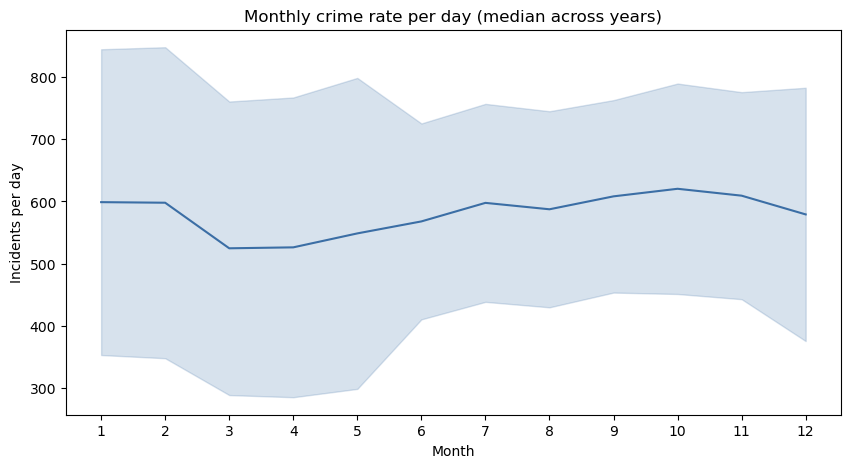

Summer–Winter Δ incidents/day = -29.429  (95% CI [-77.527, 18.443])


In [76]:
# H2 seaconality: month-length normalized + summer-winter test
# Monthly counts normalized by days-in-month
# --- Seasonality plot  ---
tmp = monthly.copy()
plt.figure(figsize=(10,5))
sns.lineplot(data=tmp, x="Month", y="RatePerDay", estimator="median", errorbar="sd", color="#3b6ea5")
plt.title("Monthly crime rate per day (median across years)")
plt.ylabel("Incidents per day")
plt.xticks(range(1, 13))
plt.savefig("H2_monthly_rates.png", dpi=300, bbox_inches="tight")
plt.show()

# --- Helpers ---
def sw_diff(mdf):
    """Summer(Jun–Aug) - Winter(Dec–Feb) average rate/day."""
    s = mdf[mdf["Month"].isin([6,7,8])]["RatePerDay"].mean()
    w = mdf[mdf["Month"].isin([12,1,2])]["RatePerDay"].mean()
    return float(s - w)

# Keep only full years (12 months with non-null rates)
full_years = (
    monthly.dropna(subset=["RatePerDay"])
           .groupby("Year")["Month"].nunique()
           .pipe(lambda s: s[s >= 12].index)
)
m_full = monthly[monthly["Year"].isin(full_years)].copy()

# Guardrail: if no full years, fall back to years with >= 9 months
if len(full_years) == 0:
    relaxed_years = (
        monthly.dropna(subset=["RatePerDay"])
               .groupby("Year")["Month"].nunique()
               .pipe(lambda s: s[s >= 9].index)
    )
    m_full = monthly[monthly["Year"].isin(relaxed_years)].copy()

# --- Bootstrap (block-resample by year) ---
years = sorted(m_full["Year"].unique())
rng = np.random.default_rng(42)
diffs = []
for _ in range(3000):
    ys = rng.choice(years, size=len(years), replace=True)
    m = m_full[m_full["Year"].isin(ys)]
    d = sw_diff(m)
    if not np.isnan(d):
        diffs.append(d)

# Point estimate from the original (filtered) data
est = sw_diff(m_full)

# Percentile CI (after dropping NaNs)
diffs = np.array(diffs)
ci_low, ci_high = np.percentile(diffs, [2.5, 97.5]) if diffs.size else (np.nan, np.nan)
print(f"Summer–Winter Δ incidents/day = {est:.3f}  (95% CI [{ci_low:.3f}, {ci_high:.3f}])")

# Save artifacts to cite in the report
m_full.to_csv("monthly_rates_per_day.csv", index=False)
with open("H2_summer_winter_bootstrap.txt","w", encoding="utf-8") as f:
    f.write(f"Summer–Winter Δ incidents/day = {est:.3f}  (95% CI [{ci_low:.3f}, {ci_high:.3f}])\n")


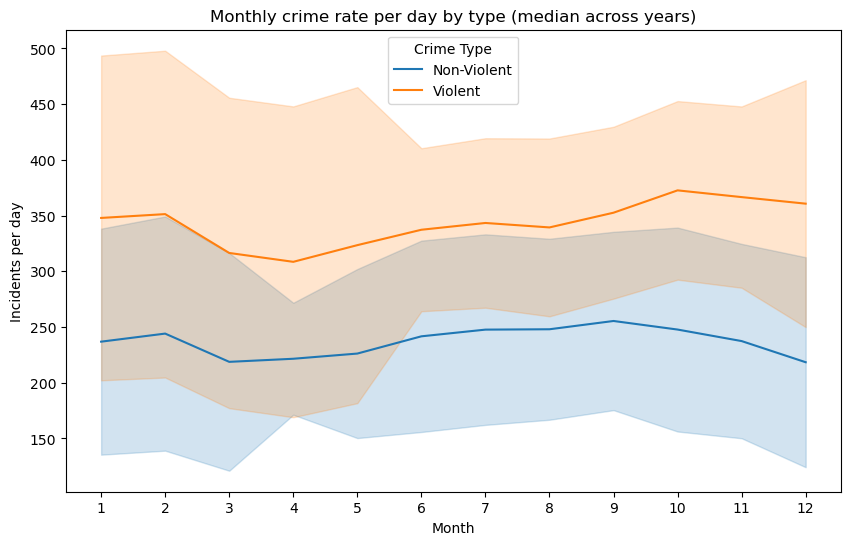

In [89]:
# H2b seaconality
monthly_vn = (
    df.dropna(subset=["DATE OCC", "Crime Type"])
      .assign(MonthStart=lambda d: d["DATE OCC"].values.astype("datetime64[M]"),
              Year=lambda d: d["DATE OCC"].dt.year,
              Month=lambda d: d["DATE OCC"].dt.month)
      .groupby(["Year", "Month", "MonthStart", "Crime Type"], as_index=False)
      .size()
)

monthly_vn["RatePerDay"] = (
    monthly_vn["size"] / monthly_vn["MonthStart"].dt.days_in_month
)

def summer_winter_diff(mdf):
    summer = mdf[mdf["Month"].isin([6,7,8])]["RatePerDay"].mean()
    winter = mdf[mdf["Month"].isin([12,1,2])]["RatePerDay"].mean()
    return float(summer - winter)

def bootstrap_sw(mdf, n_boot=3000, seed=42):
    years = sorted(mdf["Year"].unique())
    rng = np.random.default_rng(seed)
    diffs = []
    for _ in range(n_boot):
        ys = rng.choice(years, size=len(years), replace=True)
        m = mdf[mdf["Year"].isin(ys)]
        d = summer_winter_diff(m)
        if not np.isnan(d):
            diffs.append(d)
    est = summer_winter_diff(mdf)
    ci_low, ci_high = np.percentile(diffs, [2.5, 97.5]) if len(diffs) else (np.nan, np.nan)
    return est, ci_low, ci_high

results = []
for ctype in monthly_vn["Crime Type"].unique():
    m = monthly_vn[monthly_vn["Crime Type"] == ctype]
    est, lo, hi = bootstrap_sw(m)
    results.append({"Crime Type": ctype, "Δ Summer-Winter": est, "95% CI Low": lo, "95% CI High": hi})

pd.DataFrame(results)

#-------------Line plot w/ two curves to show violent vs non-violent---------------
plt.figure(figsize=(10,6))
sns.lineplot(
    data=monthly_vn,
    x="Month", y="RatePerDay",
    hue="Crime Type",
    estimator="median", errorbar="sd"
)
plt.title("Monthly crime rate per day by type (median across years)")
plt.ylabel("Incidents per day")
plt.xticks(range(1,13))
plt.legend(title="Crime Type")
plt.savefig("H2b_monthly_rates_by_type.png", dpi=300, bbox_inches="tight")
plt.show()


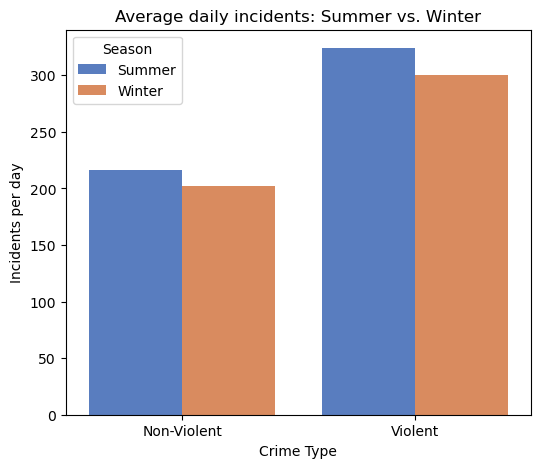

In [91]:
# H2c - Bar Chart
season_means = (
    monthly_vn[monthly_vn["Month"].isin([6,7,8,12,1,2])]
    .assign(Season=lambda d: d["Month"].map({6:"Summer",7:"Summer",8:"Summer",12:"Winter",1:"Winter",2:"Winter"}))
    .groupby(["Crime Type","Season"], as_index=False)["RatePerDay"].mean()
)

plt.figure(figsize=(6,5))
sns.barplot(data=season_means, x="Crime Type", y="RatePerDay", hue="Season", palette="muted")
plt.title("Average daily incidents: Summer vs. Winter")
plt.ylabel("Incidents per day")
plt.savefig("H2c_summer_vs_winter_bar.png", dpi=300, bbox_inches="tight")
plt.show()


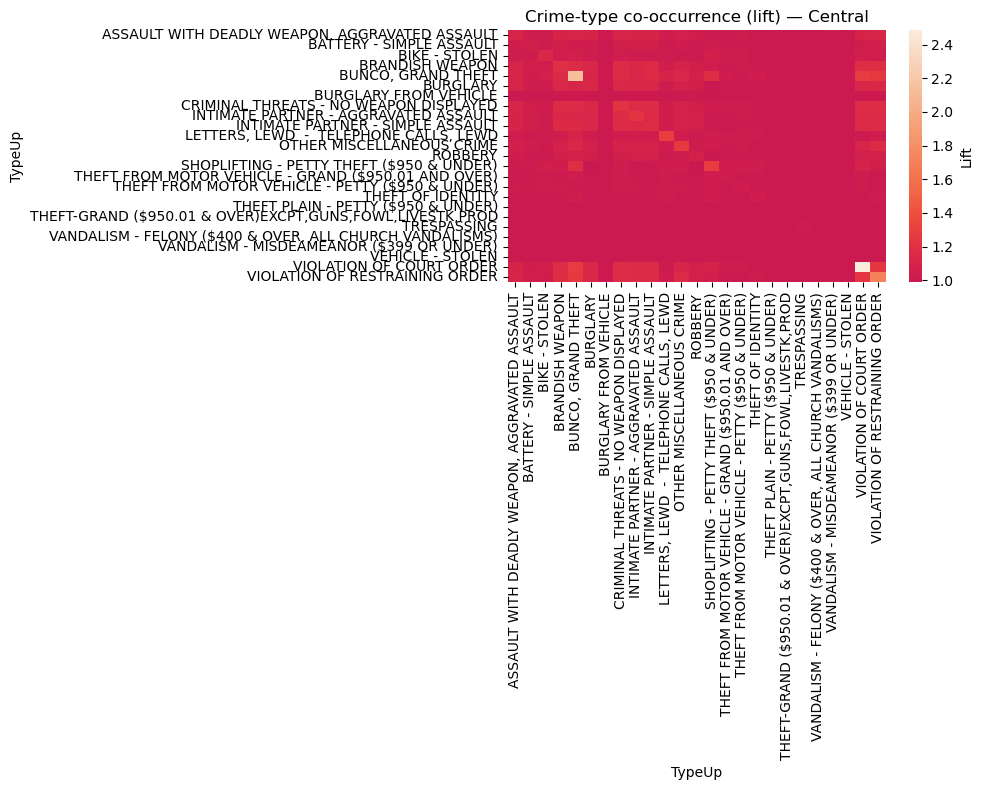

In [81]:
# H3 co‑occurrence: lift by district × time bucket (base‑rate corrected)
# Focus on top types for stability (Top 25)
sub = df.dropna(subset=["AREA NAME", "Time Bucket", "Crm Cd Desc", "DATE OCC"]).copy()
sub["TypeUp"] = sub["Crm Cd Desc"].astype(str).str.upper()
top_types = sub["TypeUp"].value_counts().head(25).index
sub = sub[sub["TypeUp"].isin(top_types)].copy()
sub["MonthStart"] = sub["DATE OCC"].values.astype("datetime64[M]")

slice_cols = ["AREA NAME", "MonthStart", "Time Bucket"]

# Presence matrix of types within each slice (1 if at least one incident of that type in the slice)
presence = (sub.assign(v=1)
              .pivot_table(index=slice_cols, columns="TypeUp", values="v", aggfunc="max", fill_value=0)
              .sort_index())

# Lift = P(A&B) / (P(A)P(B)) computed across all slices
p = presence.mean(axis=0).values                      # P(type)
co = (presence.T @ presence) / len(presence)          # P(A & B)
den = np.outer(p, p)
with np.errstate(divide='ignore', invalid='ignore'):
    L = np.where(den > 0, co/den, np.nan)
np.fill_diagonal(L, np.nan)
lift = pd.DataFrame(L, index=presence.columns, columns=presence.columns)
lift.to_csv("crime_cooccurrence_lift.csv")

# Optional: visualize lift for a particular area
focus_area = sub["AREA NAME"].mode().iloc[0]
lift_area = (sub[sub["AREA NAME"] == focus_area]
             .assign(v=1)
             .pivot_table(index=["MonthStart","Time Bucket"], columns="TypeUp", values="v", aggfunc="max", fill_value=0))
pA = lift_area.mean(axis=0).values
coA = (lift_area.T @ lift_area) / len(lift_area)
denA = np.outer(pA, pA)
LA = np.where(denA > 0, coA/denA, np.nan)
liftA = pd.DataFrame(LA, index=lift_area.columns, columns=lift_area.columns)

plt.figure(figsize=(10,8))
sns.heatmap(liftA, cmap="rocket", center=1.0, cbar_kws={"label":"Lift"})
plt.title(f"Crime-type co‑occurrence (lift) — {focus_area}")
plt.tight_layout()
plt.savefig("H3_cooccurrence_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()



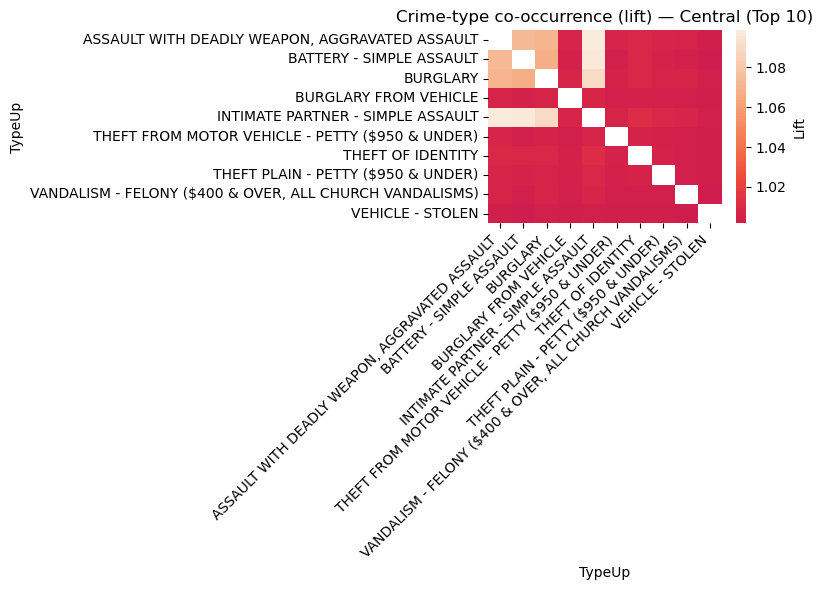

In [95]:
# H3b
#--- Focus on top 10 crime types for readability ---
sub = df.dropna(subset=["AREA NAME", "Time Bucket", "Crm Cd Desc", "DATE OCC"]).copy()
sub["TypeUp"] = sub["Crm Cd Desc"].astype(str).str.upper()

# Get the top 10 by frequency
top10_types = sub["TypeUp"].value_counts().head(10).index
sub = sub[sub["TypeUp"].isin(top10_types)].copy()

# Add MonthStart for time slicing
sub["MonthStart"] = sub["DATE OCC"].values.astype("datetime64[M]")

# Pivot to presence matrix by slice (district × month × time bucket)
slice_cols = ["AREA NAME", "MonthStart", "Time Bucket"]
presence10 = (
    sub.assign(v=1)
       .pivot_table(index=slice_cols, columns="TypeUp", values="v", aggfunc="max", fill_value=0)
       .sort_index()
)

# Compute lift matrix
p = presence10.mean(axis=0).values
co = (presence10.T @ presence10) / len(presence10)
den = np.outer(p, p)
with np.errstate(divide="ignore", invalid="ignore"):
    L = np.where(den > 0, co/den, np.nan)
np.fill_diagonal(L, np.nan)

lift10 = pd.DataFrame(L, index=presence10.columns, columns=presence10.columns)

# --- Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(lift10, cmap="rocket", center=1.0, cbar_kws={"label": "Lift"})
plt.title("Crime-type co-occurrence (lift) — Central (Top 10)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("H3b_cooccurrence_heatmap_top10.png", dpi=300, bbox_inches="tight")
plt.show()

# Save matrix for appendix
lift10.to_csv("crime_cooccurrence_lift_top10.csv")


Saved: C:\Users\rebah\OneDrive\Documents\0. UofL Computer Science Program\5. Fall 2025\CSE 632 - Data Mining\Projects\0a. Project 1\figures\H3c_cooccurrence_heatmap_top10_by_time.png


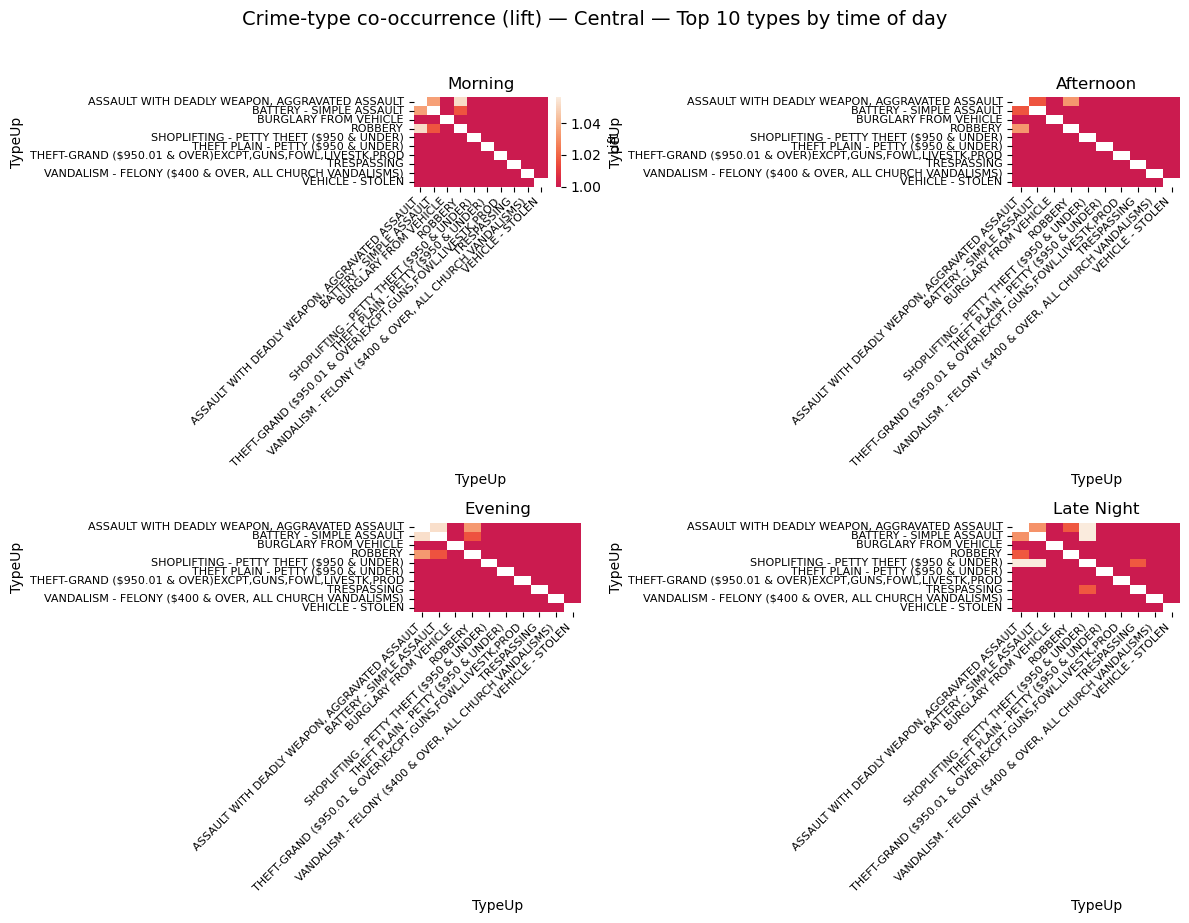

In [101]:
# H3c
# === Faceted co-occurrence (lift) by time bucket for TOP-10 crime types ===
from pathlib import Path

# ---------- config ----------
AREA_FOCUS = "Central"            
TIME_LEVELS = ["Morning", "Afternoon", "Evening", "Late Night"]  # my buckets
FIGDIR = Path("figures"); FIGDIR.mkdir(exist_ok=True)

# ---------- prep: filter + top10 selection ----------
sub = df.dropna(subset=["AREA NAME", "Time Bucket", "Crm Cd Desc", "DATE OCC"]).copy()
sub["TypeUp"] = sub["Crm Cd Desc"].astype(str).str.upper()
sub["MonthStart"] = sub["DATE OCC"].values.astype("datetime64[M]")

# focus area
sub = sub[sub["AREA NAME"].str.title() == AREA_FOCUS.title()].copy()

# top 10 types for stability/readability (in THIS area)
top10_types = sub["TypeUp"].value_counts().head(10).index
sub = sub[sub["TypeUp"].isin(top10_types)].copy()

# ---------- helper to compute lift matrix for one time bucket ----------
def lift_matrix_for_bucket(frame, time_bucket):
    """Return lift DF (types x types) for a given time bucket; NaNs if insufficient data."""
    fr = frame[frame["Time Bucket"] == time_bucket].copy()
    if fr.empty:
        return None
    # presence by slice (month x bucket -> already fixed bucket, keep month)
    pres = (fr.assign(v=1)
              .pivot_table(index=["MonthStart"], columns="TypeUp", values="v",
                           aggfunc="max", fill_value=0, observed=True)
              .sort_index())
    if pres.empty or len(pres) < 2:
        return None
    types = pres.columns
    p = pres.mean(axis=0).values                   # P(type)
    co = (pres.T @ pres) / len(pres)               # P(A & B)
    den = np.outer(p, p)
    with np.errstate(divide="ignore", invalid="ignore"):
        L = np.where(den > 0, co/den, np.nan)
    np.fill_diagonal(L, np.nan)
    return pd.DataFrame(L, index=types, columns=types)

# ---------- compute lifts for all time buckets ----------
lift_by_bucket = {tb: lift_matrix_for_bucket(sub, tb) for tb in TIME_LEVELS}

# stack all values to choose a common color scale (robust upper bound)
all_vals = np.concatenate([
    d.values.flatten() for d in lift_by_bucket.values() if d is not None
])
all_vals = all_vals[np.isfinite(all_vals)]
if all_vals.size:
    vmin, vmax = 1.0, np.nanpercentile(all_vals, 99)  # center at 1.0, clip at 99th pct
else:
    vmin, vmax = 1.0, 1.2  # fallback

# ---------- plot facets ----------
n_cols = 2
n_rows = int(np.ceil(len(TIME_LEVELS)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 9))
axes = np.ravel(axes)

for i, tb in enumerate(TIME_LEVELS):
    ax = axes[i]
    L = lift_by_bucket[tb]
    ax.set_title(tb)
    if L is None:
        ax.axis("off")
        ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
        continue
    sns.heatmap(
        L, ax=ax, cmap="rocket", vmin=vmin, vmax=vmax, center=1.0,
        cbar=i==0, cbar_kws={"label": "Lift"}
    )
    ax.set_xlabel("TypeUp"); ax.set_ylabel("TypeUp")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)

# hide any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

fig.suptitle(f"Crime-type co-occurrence (lift) — {AREA_FOCUS} — Top 10 types by time of day", y=1.02, fontsize=14)
plt.tight_layout()
out = FIGDIR / "H3c_cooccurrence_heatmap_top10_by_time.png"
fig.savefig(out, dpi=300, bbox_inches="tight")
print("Saved:", out.resolve())
plt.show()


In [103]:
from pathlib import Path
print("Notebook is running in:", Path.cwd())
print("Figures are saved in:", (Path.cwd() / "figures").resolve())

Notebook is running in: C:\Users\rebah\OneDrive\Documents\0. UofL Computer Science Program\5. Fall 2025\CSE 632 - Data Mining\Projects\0a. Project 1
Figures are saved in: C:\Users\rebah\OneDrive\Documents\0. UofL Computer Science Program\5. Fall 2025\CSE 632 - Data Mining\Projects\0a. Project 1\figures
